In this project I will be comparing a few methods for classifying zoo animals based on 16 features. Method 1 will be via random forest method 2 is logistic regression method 3 is K nearest neighbors. Then I will compare how the three methods performed on this dataset in my report as well as how different hyperparameters effected performance

### Setup (library imports, connect google drive etc.)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries for the rest of the project here

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Data collection and preprocessing



In [ ]:
# download dataset from kaggle
# sometimes this cell needs to be run multiple times to get it to copy the key properly
! pip install -q kaggle
from google.colab import files
! cp /content/drive/MyDrive/school/2022_Fall/400m/final_project/kaggle.json ~/.kaggle/
! chmod 600 /content/drive/MyDrive/school/2022_Fall/400m/final_project/kaggle.json
! kaggle datasets download -d agajorte/zoo-animals-extended-dataset
! kaggle datasets download -d uciml/zoo-animal-classification
! mkdir train
! unzip /content/zoo-animals-extended-dataset.zip -d train
! unzip /content/zoo-animal-classification.zip -d train

check that the dataset it loaded correctly

In [11]:
# original test dataset of zoo animals
train_df = pd.read_csv('/content/train/zoo.csv')
df3 = train_df
x=df3.drop(['animal_name','class_type'],axis=1)
y=df3['class_type']
# split into training and validation
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)

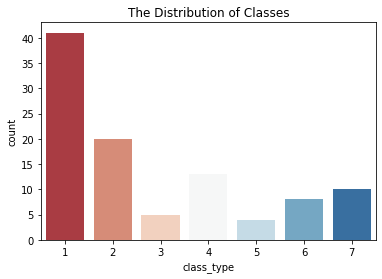

In [14]:
# There is a custom weight parameter, I am going to assign the weights based on the class distribution to see if it increases accuracy
sns.countplot(data = df3, x = "class_type", palette = "RdBu")
plt.title("The Distribution of Classes")
# classes are as follows: mammals, birds, reptiles, fish, amphibians, insects, non-insect invertebrates?
train_weight = {1:41, 2:20, 3:5, 4:13, 5:4, 6:6, 7:10}
train_weight_inverted = {1:4, 2:5, 3:20, 4:6, 5:41, 6:13, 7:10}

## Method 1: Random Forest Classification

model 1-1:\
only using 1 tree so this is esentially just a decision tree not RF

In [15]:
RFmodel_1 = RandomForestClassifier(n_estimators = 1, criterion = 'gini', bootstrap=True, random_state = 12,)
RFmodel_1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1, random_state=12)

In [16]:
print('model Train Score is : ' , RFmodel_1.score(X_train, y_train))
print('model Test Score is : ' , RFmodel_1.score(X_test, y_test))
clf = RFmodel_1
scores = cross_val_score(clf, X_train, y_train, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model Train Score is :  0.9625
model Test Score is :  0.9523809523809523
0.84 accuracy with a standard deviation of 0.04


model 1-2:\
RF with 10 trees

In [17]:
RFmodel_2 = RandomForestClassifier(n_estimators = 10, criterion = 'gini', bootstrap=True, random_state = 12,)
RFmodel_2.fit(X_train, y_train)
print('model Train Score is : ' , RFmodel_2.score(X_train, y_train))
print('model Test Score is : ' , RFmodel_2.score(X_test, y_test))
clf = RFmodel_2
scores = cross_val_score(clf, X_train, y_train, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model Train Score is :  1.0
model Test Score is :  0.9523809523809523
0.95 accuracy with a standard deviation of 0.05


model 1-3:\
100 trees

In [18]:
RFmodel_3 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', bootstrap=True, random_state = 12,)
RFmodel_3.fit(X_train, y_train)
print('model Train Score is : ' , RFmodel_3.score(X_train, y_train))
print('model Test Score is : ' , RFmodel_3.score(X_test, y_test))
clf = RFmodel_3
scores = cross_val_score(clf, X_train, y_train, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model Train Score is :  1.0
model Test Score is :  0.9523809523809523
0.95 accuracy with a standard deviation of 0.05


It seems like there is not really any improvement going from 10-100 trees in the forest and theat test accuracy is getting stuck at 0.9523809523809523

model 1-4:\
entropy criterion rather than gini with 10 trees

In [19]:
RFmodel_4 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', bootstrap=True, random_state = 12,)
RFmodel_4.fit(X_train, y_train)
print('model Train Score is : ' , RFmodel_4.score(X_train, y_train))
print('model Test Score is : ' , RFmodel_4.score(X_test, y_test))
clf = RFmodel_4
scores = cross_val_score(clf, X_train, y_train, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model Train Score is :  1.0
model Test Score is :  0.9523809523809523
0.92 accuracy with a standard deviation of 0.08


model 1-5:\
How about adding class weights?

In [20]:
RFmodel_5 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', bootstrap=True, random_state = 12, class_weight = train_weight)
RFmodel_5.fit(X_train, y_train)
print('model Train Score is : ' , RFmodel_5.score(X_train, y_train))
print('model Test Score is : ' , RFmodel_5.score(X_test, y_test))
clf = RFmodel_5
scores = cross_val_score(clf, X_train, y_train, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model Train Score is :  1.0
model Test Score is :  0.9523809523809523
0.95 accuracy with a standard deviation of 0.05


In [21]:
RFmodel_6 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', bootstrap=True, random_state = 12, class_weight = train_weight_inverted)
RFmodel_6.fit(X_train, y_train)
print('model Train Score is : ' , RFmodel_6.score(X_train, y_train))
print('model Test Score is : ' , RFmodel_6.score(X_test, y_test))
clf = RFmodel_6
scores = cross_val_score(clf, X_train, y_train, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model Train Score is :  1.0
model Test Score is :  0.9523809523809523
0.94 accuracy with a standard deviation of 0.06


I think that model 4 had the best performance so lets take a look at the metrics of model 4's performance:

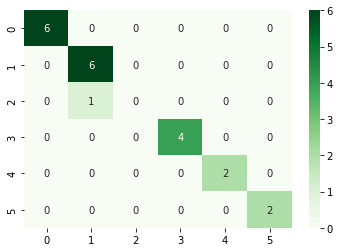

In [22]:
RFmodel_best = RFmodel_5 # tossup between 2 3 and 5
y_pred = RFmodel_best.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm, annot=True, cmap='Greens')
plt.show()

## Method 2: Logistic Regression Classification

model 2-1:\
logistic regression, starting with what was used in HW 1

In [23]:
LRmodel_1 = LogisticRegression(max_iter=50000, penalty='none', random_state=12)
LRmodel_1.fit(X_train, y_train)
print('model Train Score is : ' , LRmodel_1.score(X_train, y_train))
print('model Test Score is : ' , LRmodel_1.score(X_test, y_test))
clf = LRmodel_1
scores = cross_val_score(clf, X_train, y_train, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model Train Score is :  1.0
model Test Score is :  0.9523809523809523
0.95 accuracy with a standard deviation of 0.06


hyper parameter tuning:\
I will investigate:
1.   adding penalties 
2.   class weights



In [24]:
LRmodel_2 = LogisticRegression(max_iter=500000, penalty='none', random_state=12, solver='saga')
LRmodel_2.fit(X_train, y_train)
print('model Train Score is : ' , LRmodel_2.score(X_train, y_train))
print('model Test Score is : ' , LRmodel_2.score(X_test, y_test))
clf = LRmodel_2
scores = cross_val_score(clf, X_train, y_train, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model Train Score is :  1.0
model Test Score is :  0.9523809523809523
0.94 accuracy with a standard deviation of 0.04


In [25]:
LRmodel_3 = LogisticRegression(max_iter=500000, penalty='l1', random_state=12, solver='saga')
LRmodel_3.fit(X_train, y_train)
print('model Train Score is : ' , LRmodel_3.score(X_train, y_train))
print('model Test Score is : ' , LRmodel_3.score(X_test, y_test))
clf = LRmodel_3
scores = cross_val_score(clf, X_train, y_train, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model Train Score is :  0.9625
model Test Score is :  0.9047619047619048
0.91 accuracy with a standard deviation of 0.02


In [26]:
LRmodel_4 = LogisticRegression(max_iter=500000, penalty='l2', random_state=12, solver='saga')
LRmodel_4.fit(X_train, y_train)
print('model Train Score is : ' , LRmodel_4.score(X_train, y_train))
print('model Test Score is : ' , LRmodel_4.score(X_test, y_test))
clf = LRmodel_4
scores = cross_val_score(clf, X_train, y_train, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model Train Score is :  1.0
model Test Score is :  0.9523809523809523
0.94 accuracy with a standard deviation of 0.04


best score belongs to index:  lbfgs with an accuracy of 0.9523809523809523


LogisticRegression(max_iter=500000, penalty='none', random_state=12)

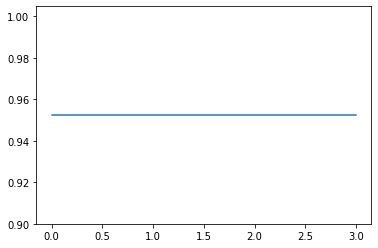

In [27]:
score = []
solvers = ['lbfgs', 'newton-cg', 'sag', 'saga']
for solver in solvers:
  LRmodel_n = LogisticRegression(max_iter=500000, penalty='none', random_state=12, solver=solver)
  LRmodel_n.fit(X_train, y_train)
  score.append(LRmodel_n.score(X_test, y_test))
plt.plot(score)
print('best score belongs to index: ', solvers[np.asarray(score).argmax()], 'with an accuracy of', score[np.asarray(score).argmax()])
best_solver = solvers[np.asarray(score).argmax()]
LRmodel_best = LogisticRegression(max_iter=500000, penalty='none', random_state=12, solver=best_solver)
LRmodel_best.fit(X_train, y_train)

In [28]:
LRmodel_5 = LogisticRegression(max_iter=50000, penalty='none', random_state=12, class_weight = train_weight, solver = 'lbfgs')
LRmodel_5.fit(X_train, y_train)
print('model Train Score is : ' , LRmodel_5.score(X_train, y_train))
print('model Test Score is : ' , LRmodel_5.score(X_test, y_test))
clf = LRmodel_5
scores = cross_val_score(clf, X_train, y_train, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model Train Score is :  1.0
model Test Score is :  1.0
0.94 accuracy with a standard deviation of 0.04


In [29]:
LRmodel_6 = LogisticRegression(max_iter=50000, penalty='none', random_state=12, class_weight = train_weight_inverted, solver = 'lbfgs')
LRmodel_6.fit(X_train, y_train)
print('model Train Score is : ' , LRmodel_6.score(X_train, y_train))
print('model Test Score is : ' , LRmodel_6.score(X_test, y_test))
clf = LRmodel_6
scores = cross_val_score(clf, X_train, y_train, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model Train Score is :  1.0
model Test Score is :  0.9523809523809523
0.95 accuracy with a standard deviation of 0.04


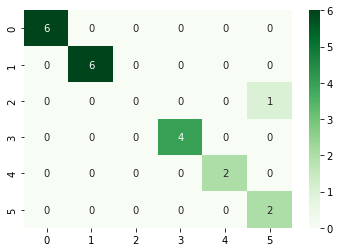

In [30]:
y_pred=LRmodel_best.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm, annot=True, cmap='Greens')
plt.show() 

## Method 3: K-nearest-neighbors Classification

best score belongs to :  1 with an accuracy of 0.7625
0.96 accuracy with a standard deviation of 0.04


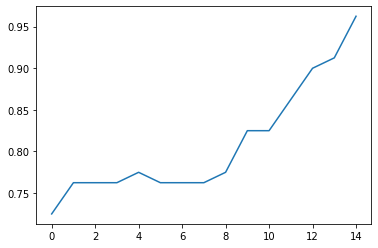

In [31]:
# start with n = sqrt(samples) --> sqrt(102) = ~10 
# so try values around 9
score = []
vals = [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
for n in vals:
  KNNmodel_n = KNeighborsClassifier(n_neighbors=n)
  KNNmodel_n.fit(X_train, y_train)
  clf = KNNmodel_n
  scores = cross_val_score(clf, X_train, y_train, cv=4)
  score.append(scores.mean())
plt.plot(score)
best_n = vals[np.asarray(score).argmax()]
KNNmodel_best = KNeighborsClassifier(n_neighbors=best_n)
print('best score belongs to : ', best_n, 'with an accuracy of', score[best_n])
KNNmodel_best.fit(X_train, y_train)
clf = KNNmodel_best
scores = cross_val_score(clf, X_train, y_train, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

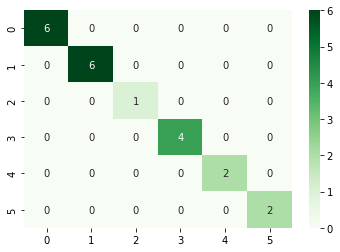

In [32]:
y_pred=KNNmodel_best.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm, annot=True, cmap='Greens')
plt.show()

## Comparison of Each Method's Best Models

Lets test how these models generalize on new data 

In [33]:
# extra dataset from kaggle I will use to test the best performing of each model
df = pd.read_csv('/content/train/zoo2.csv')
df2 = pd.read_csv('/content/train/zoo3.csv')
testdf = pd.concat([df, df2], ignore_index=True)
testdf.drop('animal_name', inplace=True, axis=1)
test_y = testdf['class_type']
testdf.drop('class_type', inplace=True, axis=1)
test_x = testdf

In [34]:
# helper functions to calculate the metrics I want to see
# accuracy, recall, precision, f1
def metrics(y_true, y_pred, model_name):
  print(model_name)
  print('accuracy score: ')
  print(accuracy_score(y_true, y_pred))

  print('recall scores in order of macro, micro, weighted: ')
  print(recall_score(y_true, y_pred, average='macro'))
  print(recall_score(y_true, y_pred, average='micro'))
  print(recall_score(y_true, y_pred, average='weighted'))

  print('precision scores in order of macro, micro, weighted: ')  
  print(precision_score(y_true, y_pred, average='macro'))
  print(precision_score(y_true, y_pred, average='micro'))
  print(precision_score(y_true, y_pred, average='weighted'))

  print('f1 scores in order of macro, micro, weighted: ')
  print(f1_score(y_true, y_pred, average='macro'))
  print(f1_score(y_true, y_pred, average='micro'))
  print(f1_score(y_true, y_pred, average='weighted'))

RandomForestClassifier(class_weight={1: 41, 2: 20, 3: 5, 4: 13, 5: 4, 6: 6,
                                     7: 10},
                       criterion='entropy', random_state=12)
accuracy score: 
0.9026548672566371
recall scores in order of macro, micro, weighted: 
0.8928571428571429
0.9026548672566371
0.9026548672566371
precision scores in order of macro, micro, weighted: 
0.9201575366988901
0.9026548672566371
0.9322199303568656
f1 scores in order of macro, micro, weighted: 
0.8866870254815925
0.9026548672566371
0.900517032336375


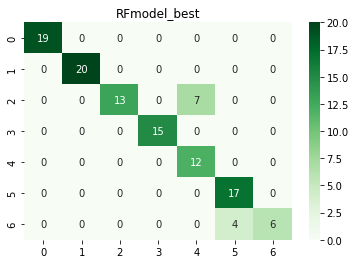

LogisticRegression(max_iter=500000, penalty='none', random_state=12)
accuracy score: 
0.9203539823008849
recall scores in order of macro, micro, weighted: 
0.927310924369748
0.9203539823008849
0.9203539823008849
precision scores in order of macro, micro, weighted: 
0.9246793454223796
0.9203539823008849
0.9431765253842571
f1 scores in order of macro, micro, weighted: 
0.9147498295505887
0.9203539823008849
0.920777861400185


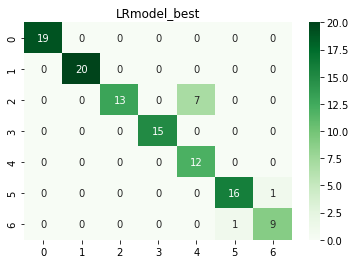

KNeighborsClassifier(n_neighbors=1)
accuracy score: 
0.911504424778761
recall scores in order of macro, micro, weighted: 
0.9095238095238095
0.911504424778761
0.911504424778761
precision scores in order of macro, micro, weighted: 
0.9226041293710466
0.911504424778761
0.9344378645729368
f1 scores in order of macro, micro, weighted: 
0.9043078872347167
0.911504424778761
0.9116302241059419


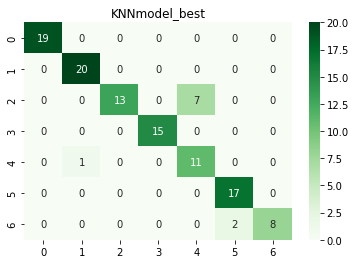

In [35]:
y_pred=RFmodel_best.predict(test_x)
cm=confusion_matrix(test_y,y_pred)
ax1 = sns.heatmap(cm, annot=True, cmap='Greens').set(title='RFmodel_best')
metrics(test_y, y_pred, str(RFmodel_best))
plt.show() 

y_pred=LRmodel_best.predict(test_x)
cm=confusion_matrix(test_y,y_pred)
ax2 = sns.heatmap(cm, annot=True, cmap='Greens').set(title='LRmodel_best')
metrics(test_y, y_pred, str(LRmodel_best))
plt.show() 

y_pred=KNNmodel_best.predict(test_x)
cm=confusion_matrix(test_y,y_pred)
ax3 = sns.heatmap(cm, annot=True, cmap='Greens').set(title='KNNmodel_best')
metrics(test_y, y_pred, str(KNNmodel_best))
plt.show() 

KNNmodel_1
accuracy score: 
0.911504424778761
recall scores in order of macro, micro, weighted: 
0.9095238095238095
0.911504424778761
0.911504424778761
precision scores in order of macro, micro, weighted: 
0.9226041293710466
0.911504424778761
0.9344378645729368
f1 scores in order of macro, micro, weighted: 
0.9043078872347167
0.911504424778761
0.9116302241059419


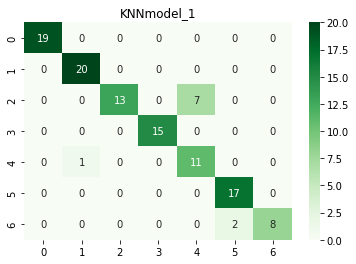

KNNmodel_3
accuracy score: 
0.8672566371681416
recall scores in order of macro, micro, weighted: 
0.8738095238095237
0.8672566371681416
0.8672566371681416
precision scores in order of macro, micro, weighted: 
0.8943934511603684
0.8672566371681416
0.9050197900221189
f1 scores in order of macro, micro, weighted: 
0.8563858470217356
0.8672566371681416
0.8561501512613103


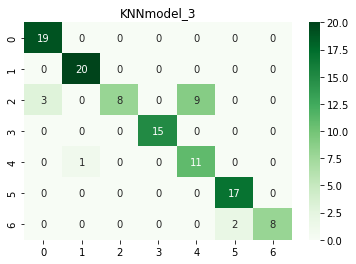

KNNmodel_5
accuracy score: 
0.7964601769911505
recall scores in order of macro, micro, weighted: 
0.8023809523809523
0.7964601769911505
0.7964601769911505
precision scores in order of macro, micro, weighted: 
0.8401749715904668
0.7964601769911505
0.8510338948564177
f1 scores in order of macro, micro, weighted: 
0.7499910624958689
0.7964601769911505
0.7439441619189257


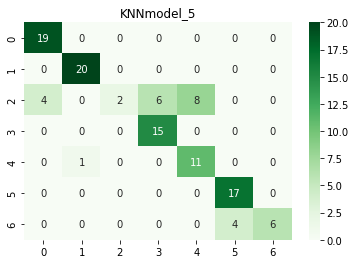

RandomForestClassifier(n_estimators=10, random_state=12)
accuracy score: 
0.8761061946902655
recall scores in order of macro, micro, weighted: 
0.8571428571428571
0.8761061946902655
0.8761061946902655
precision scores in order of macro, micro, weighted: 
0.897142857142857
0.8761061946902655
0.9093805309734514
f1 scores in order of macro, micro, weighted: 
0.8591527520098949
0.8761061946902655
0.8762785886679691


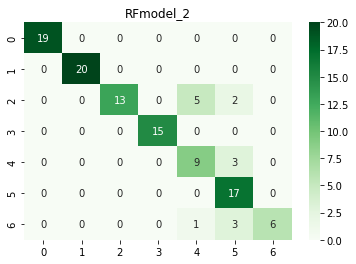

RandomForestClassifier(random_state=12)
accuracy score: 
0.9026548672566371
recall scores in order of macro, micro, weighted: 
0.8928571428571429
0.9026548672566371
0.9026548672566371
precision scores in order of macro, micro, weighted: 
0.9183673469387755
0.9026548672566371
0.9275179098187948
f1 scores in order of macro, micro, weighted: 
0.8868893408688017
0.9026548672566371
0.8989406831443935


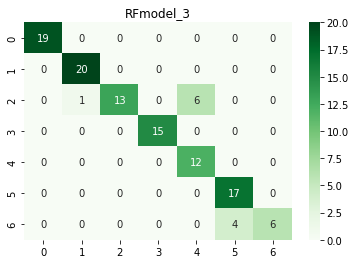

RandomForestClassifier(class_weight={1: 41, 2: 20, 3: 5, 4: 13, 5: 4, 6: 6,
                                     7: 10},
                       criterion='entropy', random_state=12)
accuracy score: 
0.9026548672566371
recall scores in order of macro, micro, weighted: 
0.8928571428571429
0.9026548672566371
0.9026548672566371
precision scores in order of macro, micro, weighted: 
0.9201575366988901
0.9026548672566371
0.9322199303568656
f1 scores in order of macro, micro, weighted: 
0.8866870254815925
0.9026548672566371
0.900517032336375


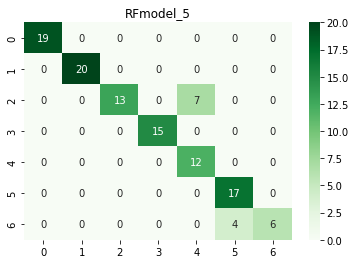

In [36]:
# I have my doubts that "KNNmodel_best" and "RFmodel_best" are actually the one that would perform the best on the test data
# I suspect both are overfit

#KNN compare 1 to 3 to 5
y_pred=KNNmodel_best.predict(test_x)
cm=confusion_matrix(test_y,y_pred)
ax3 = sns.heatmap(cm, annot=True, cmap='Greens').set(title='KNNmodel_1')
metrics(test_y, y_pred, 'KNNmodel_1')
plt.show() 

KNNmodel_3 = KNeighborsClassifier(n_neighbors=3)
KNNmodel_3.fit(X_train, y_train)
y_pred=KNNmodel_3.predict(test_x)
cm=confusion_matrix(test_y,y_pred)
ax3 = sns.heatmap(cm, annot=True, cmap='Greens').set(title='KNNmodel_3')
metrics(test_y, y_pred, 'KNNmodel_3')
plt.show() 

KNNmodel_5 = KNeighborsClassifier(n_neighbors=5)
KNNmodel_5.fit(X_train, y_train)
y_pred=KNNmodel_5.predict(test_x)
cm=confusion_matrix(test_y,y_pred)
ax3 = sns.heatmap(cm, annot=True, cmap='Greens').set(title='KNNmodel_5')
metrics(test_y, y_pred, 'KNNmodel_5')
plt.show() 


y_pred=RFmodel_2.predict(test_x)
cm=confusion_matrix(test_y,y_pred)
ax1 = sns.heatmap(cm, annot=True, cmap='Greens').set(title='RFmodel_2')
metrics(test_y, y_pred, str(RFmodel_2))
plt.show() 
y_pred=RFmodel_3.predict(test_x)
cm=confusion_matrix(test_y,y_pred)
ax1 = sns.heatmap(cm, annot=True, cmap='Greens').set(title='RFmodel_3')
metrics(test_y, y_pred, str(RFmodel_3))
plt.show() 
y_pred=RFmodel_5.predict(test_x)
cm=confusion_matrix(test_y,y_pred)
ax1 = sns.heatmap(cm, annot=True, cmap='Greens').set(title='RFmodel_5')
metrics(test_y, y_pred, str(RFmodel_5))
plt.show() 